# CIFAR-10 Image Classification Using CNN

This project aims to classify images from the CIFAR-10 dataset using a Convolutional Neural Network (CNN). The dataset consists of 60,000 32×32 color images categorized into 10 distinct classes, such as airplanes, cars, birds, cats, and more.

The goal is to:

Build a CNN model from scratch using TensorFlow/Keras.

Train the model to recognize and classify unseen images into their respective categories.

Evaluate its performance on the test dataset.

Visualize learning curves to understand training dynamics.

This project helps build foundational skills in handling multi-class image classification, CNN architecture design, and model evaluation—key concepts for more advanced computer vision tasks.




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

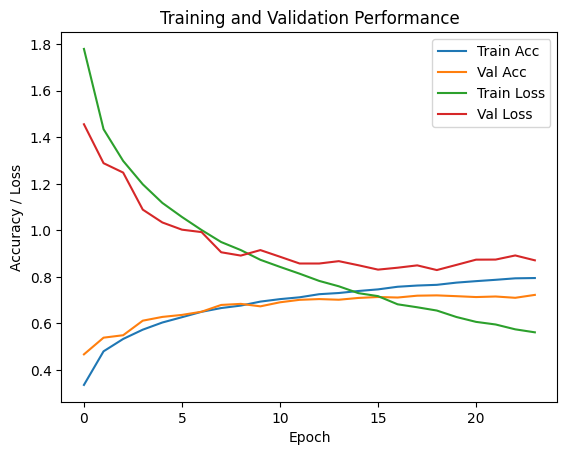

313/313 [==============================] - 3s 8ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1000
           1       0.84      0.82      0.83      1000
           2       0.56      0.63      0.60      1000
           3       0.54      0.52      0.53      1000
           4       0.67      0.64      0.65      1000
           5       0.67      0.54      0.59      1000
           6       0.83      0.76      0.79      1000
           7       0.71      0.79      0.75      1000
           8       0.80      0.83      0.81      1000
           9       0.78      0.83      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

Confusion Matrix:

[[755  24  60  12  22   3   1  13  75  35]
 [ 25 819   7   9   4   3   5   8  24  96]
 [ 70   6 632  54  86  39  47  42  14  10]
 [ 21  11  93 

In [4]:
# 1. Imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split

# 2. Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Split into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# 3. CNN Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# 4. Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# 6. Model Summary
model.summary()

# 7. Training
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, checkpoint]
)

# 8. Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Training and Validation Performance')
plt.legend()
plt.show()

# 9. Evaluation
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))
